# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

In [3]:
file= pd.read_csv('b1abb33c4f.csv', sep=',')

In [4]:
file.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [8]:
df = file
df.loc[(df['APGAR5'] > 0), 'APGAR5_cat'] = 'Asfixia Severa'
df.loc[(df['APGAR5'] >= 4) & (df['APGAR5'] <= 5), 'APGAR5_cat'] = 'Asfixia Moderada'
df.loc[(df['APGAR5'] >= 6) & (df['APGAR5'] <= 7), 'APGAR5_cat'] = 'Asfixia Leve'
df.loc[df['APGAR5'] >= 8, 'APGAR5_cat'] = 'Normal'

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

<AxesSubplot:xlabel='SEXO', ylabel='APGAR5'>

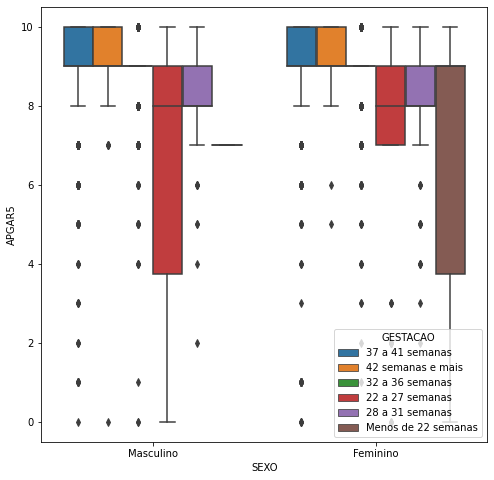

In [16]:
fig = plt.figure(figsize=(8, 8))
sns.boxplot(data=df,
            y='APGAR5',
            x='SEXO',
            orient='v',
            hue='GESTACAO'            
           )

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [19]:
tabela = pd.crosstab(file['GESTACAO'], file['APGAR5'])
display(tabela)

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [32]:
tabela = pd.crosstab(file['GESTACAO'], file['APGAR5'], normalize=True)
display(tabela)

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.000272,0.000000,0.000311,0.000233,0.000039,0.000000,0.000078,0.000389,0.000934,0.000739,0.000311
28 a 31 semanas,0.000000,0.000000,0.000078,0.000039,0.000194,0.000272,0.000272,0.000428,0.002373,0.002139,0.000506
32 a 36 semanas,0.000078,0.000078,0.000078,0.000078,0.000311,0.000428,0.000661,0.002178,0.014081,0.050838,0.018087
37 a 41 semanas,0.000194,0.000778,0.000117,0.000194,0.000272,0.000817,0.001750,0.005873,0.055117,0.527636,0.283325
42 semanas e mais,0.000039,0.000000,0.000000,0.000000,0.000000,0.000039,0.000039,0.000194,0.001711,0.016453,0.008674
Menos de 22 semanas,0.000039,0.000000,0.000039,0.000000,0.000000,0.000000,0.000000,0.000039,0.000000,0.000117,0.000039


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot:xlabel='GESTACAO'>

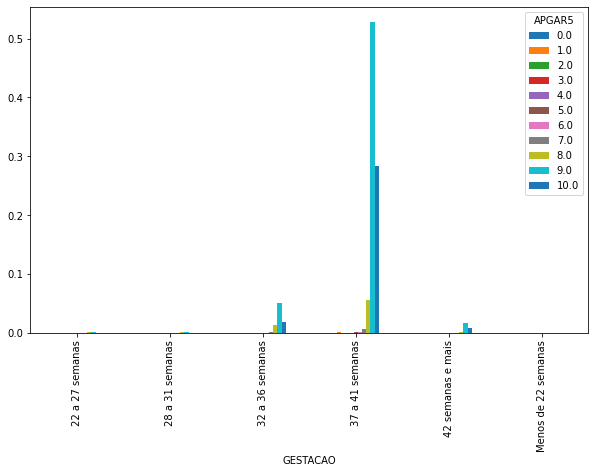

In [33]:
tabela.plot.bar(figsize=(10, 6))

Nitidamente as maiores pontuações de APGAR5 se encontram a partir de 37 semanas de gestação

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<AxesSubplot:xlabel='APGAR5', ylabel='PESO'>

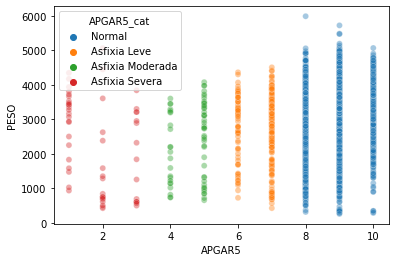

In [49]:
sns.scatterplot(x='APGAR5',
                y='PESO',
                data=file,
                hue='APGAR5_cat',
#                 size='GESTACAO',
                alpha=0.4
               )
# sns.boxplot(x='PESO',y='SEXO', hue='APGAR5_cat',data=file)